In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sharpe(tickers, start_date, end_date, trading_days):
    # Download stock data from Yahoo Finance
    stock_data = {}
    for company, ticker in tickers.items():
        try:
            stock_data[company] = yf.download(ticker, start=start_date, end=end_date)
            stock_data[company].reset_index(inplace=True)  # Reset index
        except Exception as e:
            print(f"Error downloading data for {company}: {e}")
            continue

    # Calculate daily returns
    daily_returns = {}
    for company, data in stock_data.items():
        if not data.empty:
            data['Daily Return'] = data['Close'].pct_change()
            daily_returns[company] = data['Daily Return']

    # Calculate annualized mean daily return, volatility, and Sharpe ratio
    metrics = []

    for company, returns in daily_returns.items():
        if not returns.empty:
            mean_return = returns.mean() * trading_days
            volatility = returns.std() * np.sqrt(trading_days)
            sharpe_ratio = mean_return / volatility
            metrics.append((company, mean_return, volatility, sharpe_ratio))

    # Convert metrics to DataFrame
    metrics_df = pd.DataFrame(metrics, columns=['Company', 'Mean Return', 'Volatility', 'Sharpe Ratio'])

    # Create a scatter plot
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(metrics_df['Volatility'], metrics_df['Mean Return'], c=metrics_df['Sharpe Ratio'], cmap='viridis', s=100, alpha=1, edgecolors='w')

    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Ratio de Sharpe', fontsize=14, fontweight='bold')

    # Customize the title and labels
    plt.title(f'Rendimiento Promedio vs. Volatilidad (Color: Ratio de Sharpe) {start_date}-{end_date}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('Volatilidad', fontsize=14, fontweight='bold')
    plt.ylabel('Rendimiento', fontsize=14, fontweight='bold')

    # Add labels for each point
    for i, row in metrics_df.iterrows():
        plt.text(row['Volatility'], row['Mean Return'], row['Company'], fontsize=9, ha='right', fontweight='bold')

    # Show the plot
    plt.grid(True, linestyle='--', linewidth=0.7, axis='both')
    plt.tight_layout()
    plt.show()

    return metrics_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


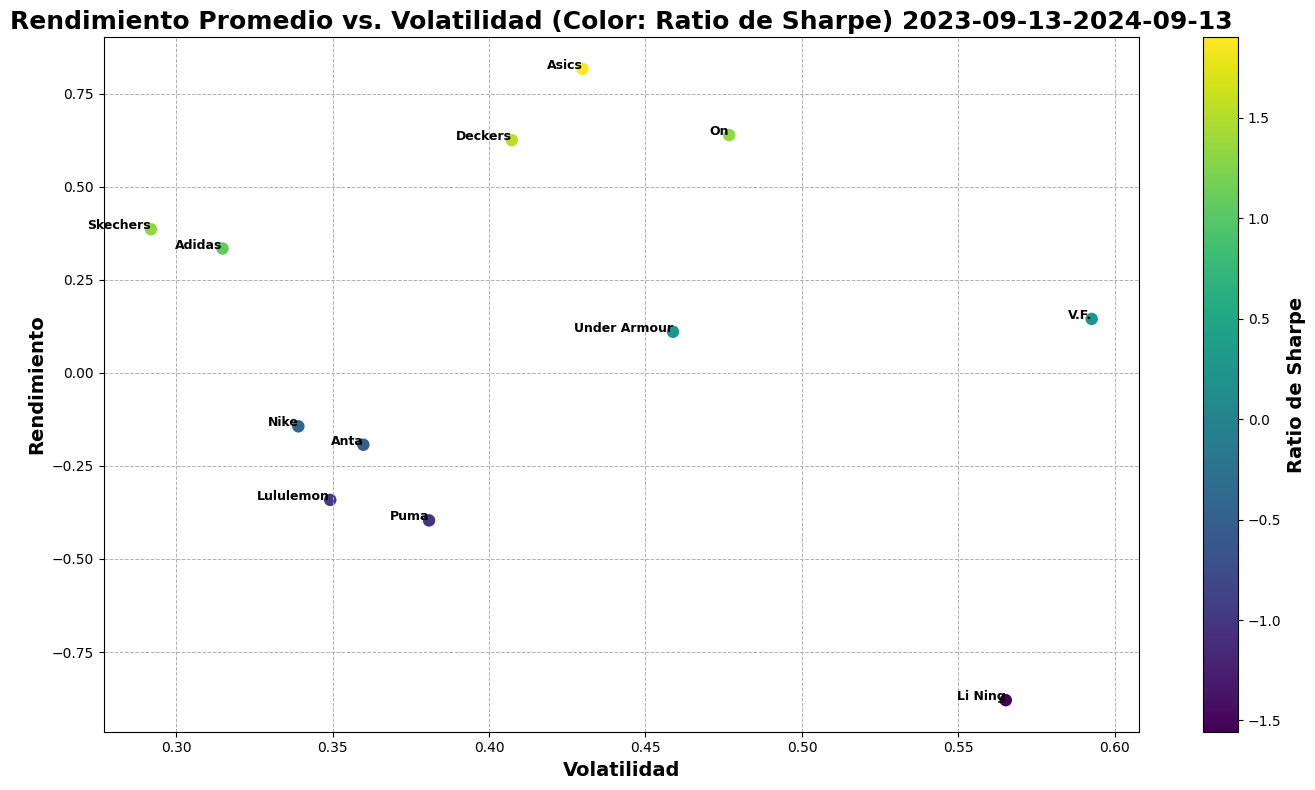

ValueError: too many values to unpack (expected 3)

In [2]:
tickers = {
    'Nike': 'NKE',
    'Adidas': 'ADDYY',
    'Under Armour': 'UAA',
    'Puma': 'PUM.DE',
    'Skechers': 'SKX',
    'Lululemon': 'LULU',
    'On': 'ONON',
    'Deckers': 'DECK',
    'Anta': 'ANPDY',
    'Li Ning': 'LNNGY',
    'V.F.': 'VFC',
    'Asics': 'ASCCY'
}

start_date = "2023-09-13"
end_date = "2024-09-13"
training_days = 252

metrics_df, avg_return, avg_volatility = sharpe(tickers, start_date, end_date, 252)


In [7]:
## Sharpe Ratio ordenado de mayor a menor
metrics_df.sort_values(by='Sharpe Ratio', ascending=False, inplace=True)

## Print the sorted DataFrame
print(metrics_df)

               Company  Annualized Mean Return  Annualized Volatility  \
11             Walmart                0.391716               0.183987   
7               NVIDIA                1.101323               0.518789   
8       JPMorgan Chase                0.364925               0.193967   
27             Netflix                0.563151               0.321529   
6       Meta Platforms                0.612650               0.368955   
16           Coca-Cola                0.207853               0.134831   
19              AbbVie                0.269319               0.192658   
17     Bank of America                0.324199               0.238166   
1            Microsoft                0.260527               0.199900   
28              Oracle                0.422951               0.333221   
0                Apple                0.270935               0.219898   
2               Amazon                0.298032               0.288371   
13  UnitedHealth Group                0.229608     

In [8]:
import pandas as pd

## Export the DataFrame to an Excel file
metrics_df.to_excel('metrics_sharpe_ratios.xlsx', index=False)